In [1]:
%matplotlib widget
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [6]:
arm_length = 200
forearm_length = 200

def forward_kinematics(configuration: np.ndarray, L1: float, L2: float) -> np.ndarray:
    assert configuration.shape == (2,)
    theta, phi = configuration

    return np.array([
        L1 * np.cos(theta) * np.cos(phi) - L1 * np.sin(theta) * np.sin(phi) + L2 * np.cos(theta),
        L1 * np.sin(theta) * np.cos(phi) + L1 * np.cos(theta) * np.sin(phi) + L2 * np.sin(theta),
    ])

# Objective Function for Optimization
def objective(joint_angles, target, current_angles, L1, L2):
    end_effector = forward_kinematics(joint_angles, L1, L2)
    position_error = np.linalg.norm(end_effector - target)  # Distance to target
    configuration_error = np.linalg.norm(joint_angles - current_angles)  # Stay close to current config
    return position_error + configuration_error

# IK Solver
def closest_ik(target, current_angles, L1, L2):
    result = minimize(
        objective,
        current_angles,  # Start from current configuration
        args=(target, current_angles, L1, L2),
        method='SLSQP',
        bounds=[(-np.pi / 2, np.pi / 2), (-3 * np.pi / 4, 3 * np.pi / 4)],  # Joint limits
        options={"disp": False}
    )
    print(result)
    return result.x if result.success else None

In [7]:
square_size = 100
square_center = np.array([0, 200])

targets = np.array([
    square_center + np.array([-square_size / 2, square_size / 2]),
    square_center + np.array([square_size / 2, square_size / 2]),
    square_center + np.array([square_size / 2, -square_size / 2]),
    square_center + np.array([-square_size / 2, -square_size / 2]),
])

In [8]:
current_angles = np.array([0, 0])

In [9]:
curr_position = np.array([0, 0, 0, 0])
outputs = []
for target in targets:
    output = closest_ik(target, current_angles, arm_length, forearm_length)
    outputs.append(output)
    current_angles = output

outputs


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.9710622695576459
       x: [ 8.885e-01  1.759e+00]
     nit: 24
     jac: [-1.682e+02  3.222e+01]
    nfev: 95
    njev: 24
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.3949220709035527
       x: [ 4.937e-01  1.759e+00]
     nit: 19
     jac: [ 2.539e+02  1.258e+02]
    nfev: 84
    njev: 19
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7012023826734491
       x: [ 8.463e-02  2.329e+00]
     nit: 19
     jac: [ 1.539e+02  3.995e+01]
    nfev: 81
    njev: 19
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6435662408414814
       x: [ 7.281e-01  2.329e+00]
     nit: 20
     jac: [ 7.702e+01  1.992e+02]
    nfev: 80
    njev: 20


[array([0.88848543, 1.75941264]),
 array([0.49369505, 1.75941201]),
 array([0.08462752, 2.3288367 ]),
 array([0.72812876, 2.32883707])]

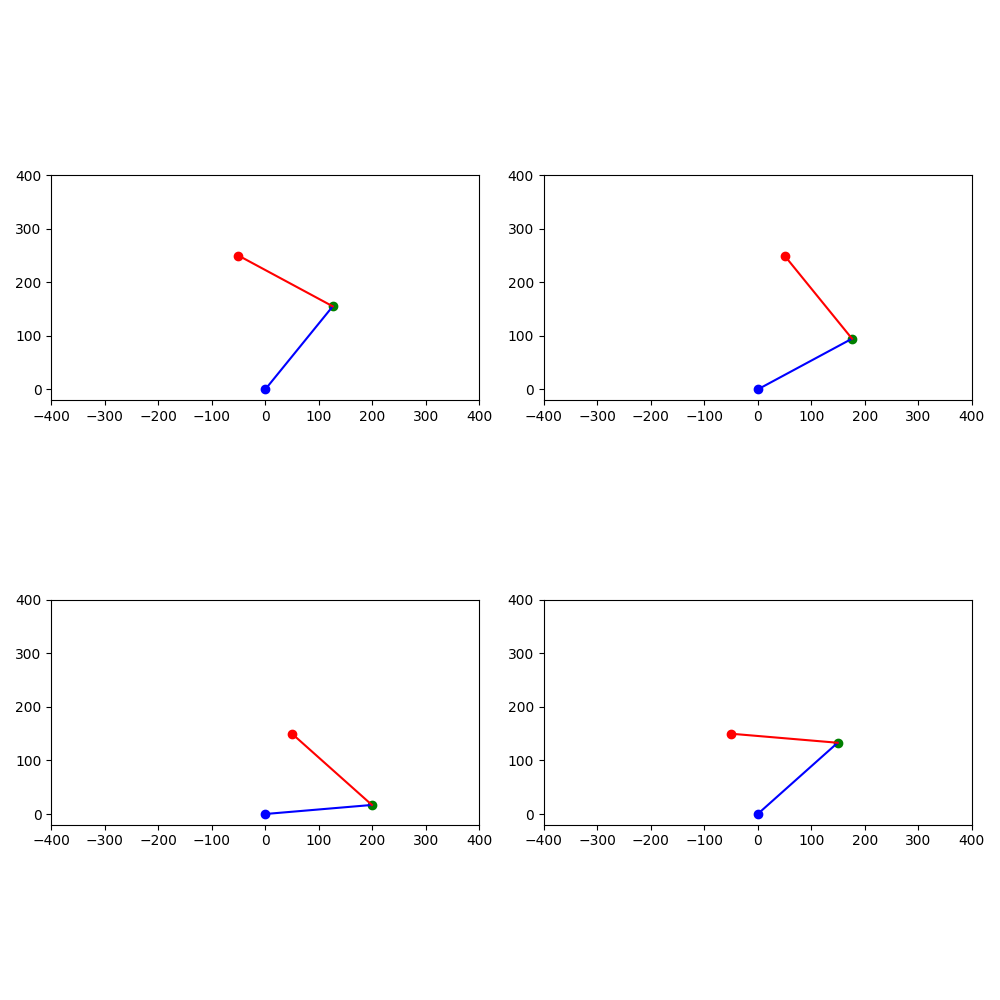

In [10]:
def plot_configuration(configuration, L1, L2, ax=None):

    if ax is None:
        fig, ax = plt.subplots()

    theta, phi = configuration
    base_pose = np.array([0, 0])

    W_u = np.array([L1 * np.cos(theta), L1 * np.sin(theta), 1])


    W_T_E = np.array([
        [np.cos(theta), -np.sin(theta), W_u[0]],
        [np.sin(theta), np.cos(theta), W_u[1]],
        [0, 0, 1]
    ])

    E_x = np.array([L2 * np.cos(phi), L2 * np.sin(phi), 1])


    W_x = np.dot(W_T_E, E_x)



    # plot the base
    ax.plot(base_pose[0], base_pose[1], 'bo')

    # plot the elbow
    ax.plot(W_u[0], W_u[1], 'go')

    # plot the line between the base and the elbow
    ax.plot([base_pose[0], W_u[0]], [base_pose[1], W_u[1]], 'b-')

    # plot the end_effector
    ax.plot(W_x[0], W_x[1], 'ro')

    # plot the line between the elbow and the end_effector
    ax.plot([W_u[0], W_x[0]], [W_u[1], W_x[1]], 'r-')


    ax.set_aspect('equal')
    ax.set_xlim(-400, 400)
    ax.set_ylim(-20, 400)




fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, output in zip(axes.flatten(), outputs):
    plot_configuration(output, arm_length, forearm_length, ax=ax)

fig.tight_layout()

plt.show()

In [12]:
outputs

[array([0.88848543, 1.75941264]),
 array([0.49369505, 1.75941201]),
 array([0.08462752, 2.3288367 ]),
 array([0.72812876, 2.32883707])]